In [0]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [12]:
df = pd.read_hdf('data/car.h5')
df.shape

(106494, 155)

In [13]:
# check column names
df.columns.values

array(['breadcrumb', 'created_at', 'price_currency', 'price_details',
       'price_value', 'seller_address', 'seller_name', 'seller_type',
       'feature_czujniki-parkowania-przednie',
       'feature_poduszka-powietrzna-chroniąca-kolana',
       'feature_kurtyny-powietrzne', 'feature_klimatyzacja-dwustrefowa',
       'feature_światła-led', 'feature_czujnik-zmierzchu',
       'feature_elektrycznie-ustawiane-lusterka',
       'feature_asr-(kontrola-trakcji)',
       'feature_poduszka-powietrzna-kierowcy', 'feature_cd',
       'feature_elektryczne-szyby-przednie',
       'feature_poduszka-powietrzna-pasażera',
       'feature_system-start-stop', 'feature_światła-do-jazdy-dziennej',
       'feature_komputer-pokładowy', 'feature_elektryczne-szyby-tylne',
       'feature_klimatyzacja-manualna', 'feature_tapicerka-welurowa',
       'feature_czujnik-deszczu', 'feature_światła-przeciwmgielne',
       'feature_ogrzewanie-postojowe', 'feature_radio-niefabryczne',
       'feature_regulowane-zaw

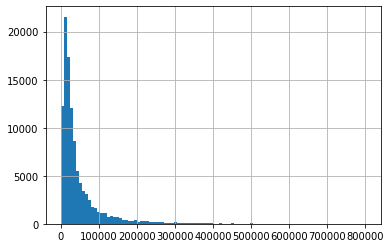

In [15]:
# price_value will be the predicting value, let's have look at it
df.price_value.hist(bins=100);

In [16]:
df.price_value.describe()

count    106494.000000
mean      47534.137437
std       66308.716918
min         400.000000
25%       13890.000000
50%       25500.000000
75%       52900.000000
max      799900.000000
Name: price_value, dtype: float64

In [18]:
# let's aggregate cars by manufacturer
# check possible values of aggregation
df['param_marka-pojazdu'].unique()

array(['Dacia', 'Peugeot', 'Porsche', 'Volkswagen', 'Škoda', 'Jeep',
       'Renault', 'Opel', 'Volvo', 'Audi', 'BMW', 'Toyota', 'Kia',
       'Hyundai', 'Citroën', 'Nissan', 'Daewoo', 'Fiat', 'Mercedes-Benz',
       'Mini', 'Ford', 'Chevrolet', 'Infiniti', 'Suzuki', 'Lexus', 'Seat',
       'Mitsubishi', 'SsangYong', 'Mazda', 'Alfa Romeo', 'Saab', 'Dodge',
       'Jaguar', 'Honda', 'Smart', 'Land Rover', 'Chrysler',
       'Aston Martin', 'Subaru', 'Piaggio', 'Daihatsu', 'Cadillac',
       'Lada', 'Iveco', 'Lincoln', 'Inny', 'Lancia', 'Yugo', 'Pontiac',
       'MG', 'Scion', None, 'Hummer', 'Polonez', 'Maybach', 'Maserati',
       'Aixam', 'Bentley', 'Lamborghini', 'Isuzu', 'Gaz', 'Rover',
       'Wartburg', 'Mercury', 'Ferrari', 'Oldsmobile', 'Rolls-Royce',
       'Moskwicz', 'Ligier', 'Vauxhall', 'Tesla', 'Microcar', 'Acura',
       'Buick', 'Tarpan', 'Uaz', 'McLaren', 'GMC', 'Warszawa', 'Morgan',
       'Żuk', 'Tata', 'Brilliance', 'Triumph', 'Chatenet', 'Zastava',
       'Wołga', '

In [22]:
df.groupby('param_marka-pojazdu')['price_value'].mean().sort_values()

param_marka-pojazdu
Tarpan           1400.000000
Talbot           2499.000000
Zastava          2999.000000
Daewoo           3651.895522
Zaporożec        3900.000000
                   ...      
Lamborghini    372400.000000
Ferrari        389748.560000
Bentley        393963.157895
McLaren        454580.000000
Maybach        489000.000000
Name: price_value, Length: 100, dtype: float64

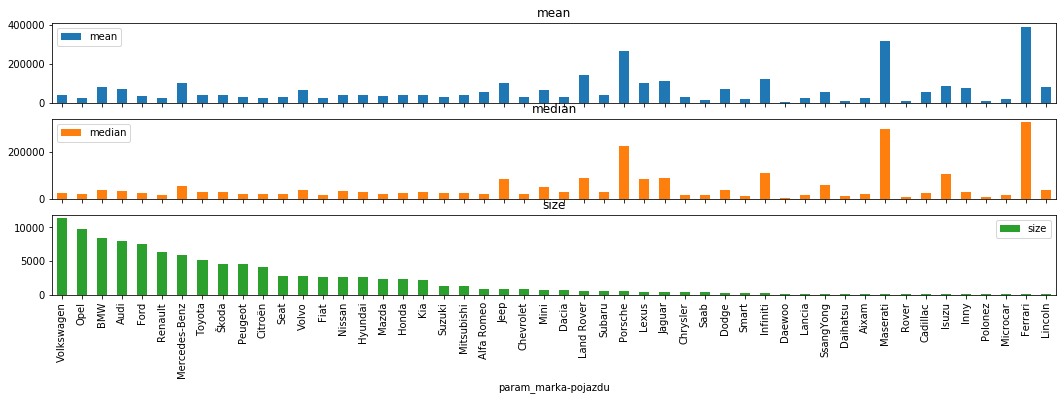

In [39]:
# plot mean, median and count values of top 50 the most expensive cars
(
    df
    .groupby('param_marka-pojazdu')['price_value']
    .agg([np.mean,np.median, np.size])
    .sort_values(by='size', ascending=False)
    .head(50)
    
 ).plot(kind='bar', figsize=(18, 5), subplots=True);

In [0]:
# create function from cell above
def group_and_plot(feat_group_by, feat_agg='price_value', agg_funcs=[np.mean, np.median, np.size], feat_sort='mean', top=50, subplots=True ):
  return (
    df
    .groupby(feat_group_by)[feat_agg]
    .agg(agg_funcs)
    .sort_values(by=feat_sort, ascending=False)
    .head(top)
    
 ).plot(kind='bar', figsize=(18, 5), subplots=subplots);

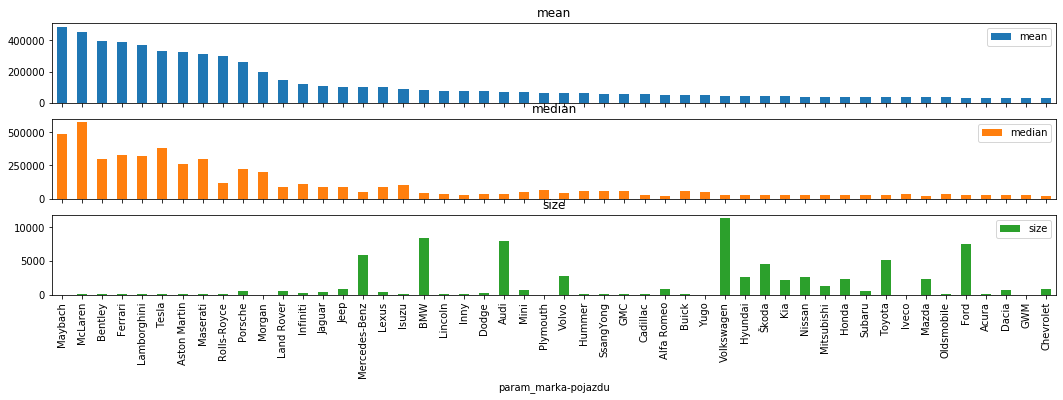

In [44]:
group_and_plot(feat_group_by='param_marka-pojazdu');

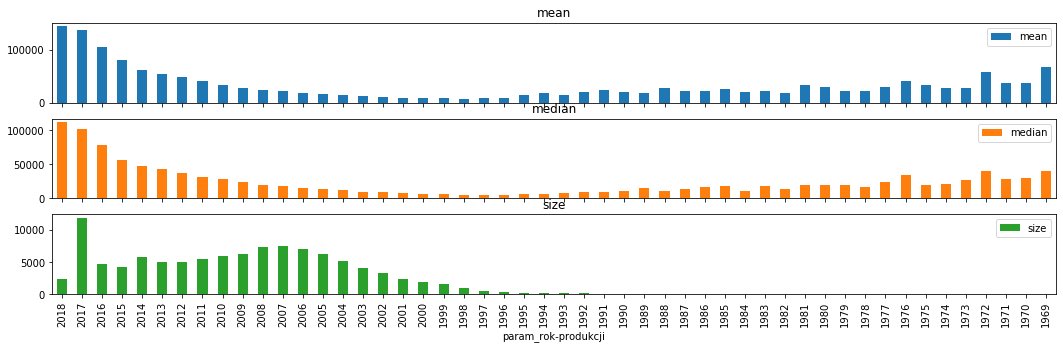

In [47]:
# will older cars be more expensive than middle-aged cars?
group_and_plot(feat_group_by='param_rok-produkcji',feat_sort='param_rok-produkcji');

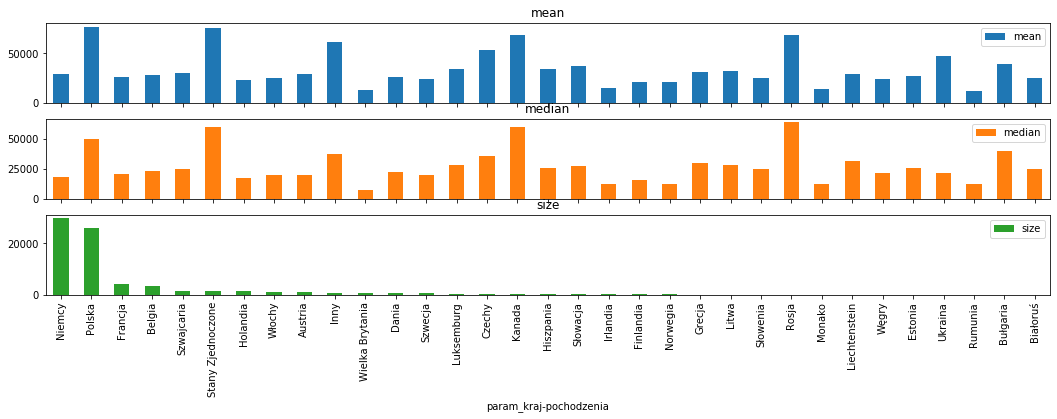

In [49]:
# price based on country of origin
group_and_plot(feat_group_by='param_kraj-pochodzenia', feat_sort='size');

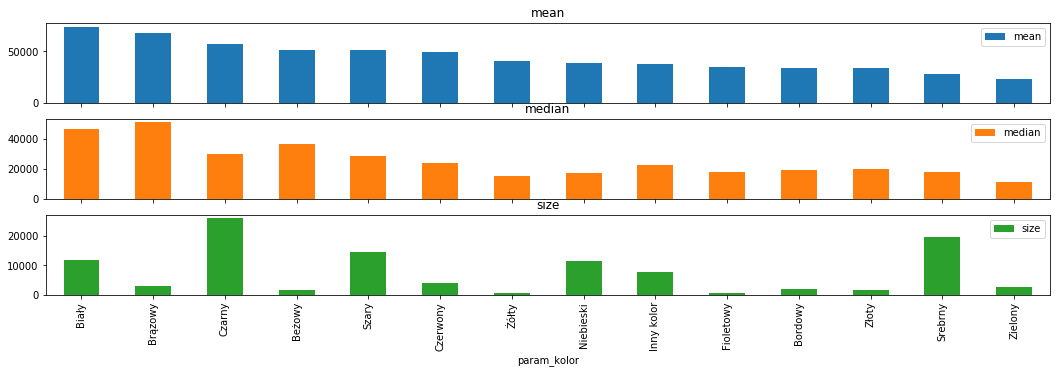

In [51]:
# price based on color
group_and_plot(feat_group_by='param_kolor', feat_sort='mean');

In [0]:
!git status